# Test on Unbalanced Test Data

### General Information:
* SigmoidCrossEntropyLoss
* with dropout layer

### experiment on different shift parameters in pythonLayer:
min_shift_t,max_shift_t,min_shift_f,max_shift_f

In [17]:
import os
import numpy as np
import os.path

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams.update({'font.size': 15})

from nideep.eval.learning_curve import LearningCurve
from nideep.eval.eval_utils import Phase

import nideep.eval.log_utils as lu
    # set up Python environment: numpy for numerical routines, and matplotlib for plotting
import h5py
import caffe
from caffe.proto import caffe_pb2
from google.protobuf import text_format
import sensSpec
#plot roc_curve:
import roc_curve
print("Done importing")
soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
print_soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femS', 'fire',
       'ftStp', 'knock', 'phone', 'piano']

Done importing


### 1. T(-30,30) F(-8,8)

In [2]:
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/22/deploy_noshift.prototxt'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/22/te'
it_1,sens_1,spec_1,bal_1 = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix= '/mnt/raid/dnn/cindy/modelfiles/22/te',
                                                      s_flag=True,
                                                                                              threshold=0.5,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=3000,
                                                      max_iter=99000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results22.npy'
tmpdata = np.array([sens_1,spec_1,bal_1])
np.save(saveFileName,tmpdata)

33 model files


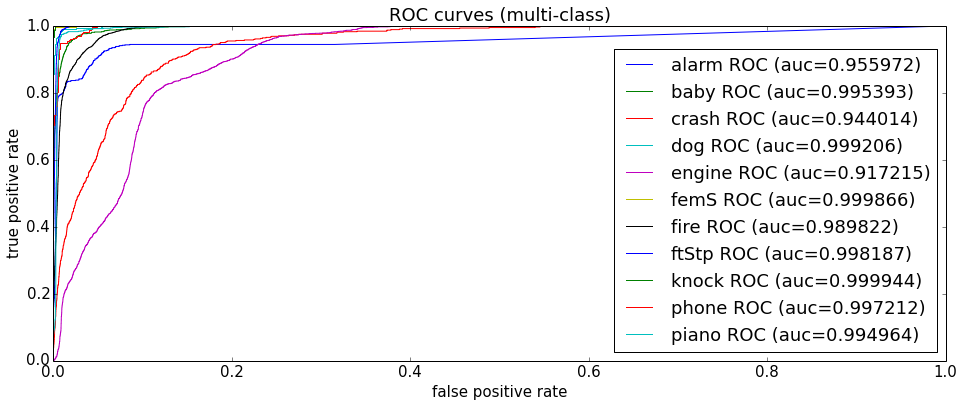

In [3]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/22/te_iter_99000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=print_soundTypes)

In [4]:
sensSpec.printResult(print_soundTypes,sens_1,spec_1,bal_1)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.792814 	 0.992734 	 0.892774
baby 	 0.921471 	 0.986769 	 0.954120
crash 	 0.748457 	 0.923237 	 0.835847
dog 	 0.952880 	 0.997038 	 0.974959
engine 	 0.639983 	 0.909295 	 0.774639
femS 	 0.992509 	 0.998719 	 0.995614
fire 	 0.883513 	 0.976103 	 0.929808
ftStp 	 0.997583 	 0.982111 	 0.989847
knock 	 1.000000 	 0.992327 	 0.996163
phone 	 0.931129 	 0.992752 	 0.961941
piano 	 0.953881 	 0.992716 	 0.973299


### 2. T(-15,15) F(-4,4) This one looks good!

In [5]:
model_def = '/mnt/antares_raid/home/cindy/sabik/experiments/s1/deploy_adhara.prototxt'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/s1/te'
it_2,sens_2,spec_2,bal_2 = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix= '/mnt/raid/dnn/cindy/modelfiles/s1/te',
                                                      s_flag=True,
                                                                                              threshold=0.5,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=3000,
                                                      max_iter=99000)

33 model files


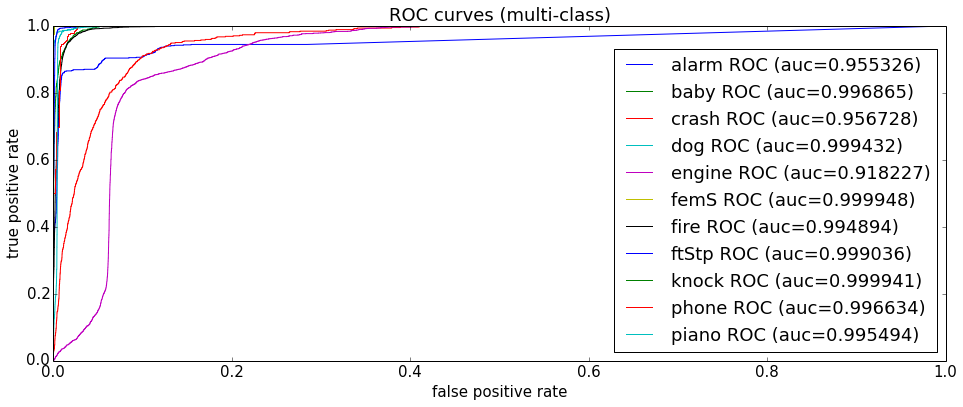

In [6]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/s1/te_iter_99000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=print_soundTypes)

In [7]:
sensSpec.printResult(print_soundTypes,sens_2,spec_2,bal_2)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.805988 	 0.991858 	 0.898923
baby 	 0.954274 	 0.982535 	 0.968405
crash 	 0.782407 	 0.938954 	 0.860681
dog 	 0.958115 	 0.997983 	 0.978049
engine 	 0.601027 	 0.935111 	 0.768069
femS 	 0.988764 	 0.998761 	 0.993763
fire 	 0.951880 	 0.982241 	 0.967060
ftStp 	 0.995166 	 0.984518 	 0.989842
knock 	 1.000000 	 0.994150 	 0.997075
phone 	 0.939394 	 0.991937 	 0.965666
piano 	 0.973003 	 0.991839 	 0.982421


### 3. T(-40,40) F(-8,8)

In [8]:
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/s2/deploy.prototxt'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/s2/te'
it_3,sens_3,spec_3,bal_3 = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix= '/mnt/raid/dnn/cindy/modelfiles/s2/te',
                                                      s_flag=True,
                                                                                              threshold=0.5,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=3000,
                                                      max_iter=99000)

33 model files


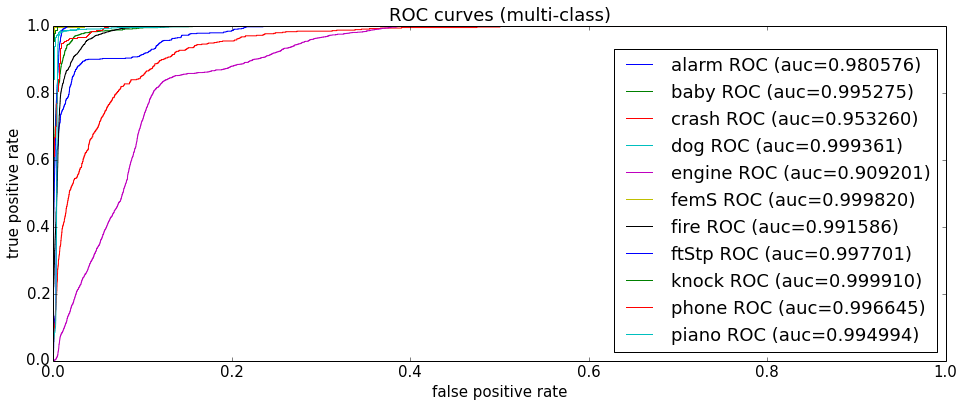

In [9]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/s2/te_iter_99000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=print_soundTypes)

In [10]:
sensSpec.printResult(print_soundTypes,sens_3,spec_3,bal_3)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.756886 	 0.988137 	 0.872512
baby 	 0.904573 	 0.988798 	 0.946685
crash 	 0.811728 	 0.925234 	 0.868481
dog 	 0.973822 	 0.995965 	 0.984894
engine 	 0.562928 	 0.915761 	 0.739344
femS 	 0.996255 	 0.998334 	 0.997294
fire 	 0.911123 	 0.975650 	 0.943387
ftStp 	 0.998187 	 0.979750 	 0.988969
knock 	 1.000000 	 0.994192 	 0.997096
phone 	 0.834711 	 0.994124 	 0.914418
piano 	 0.979753 	 0.991839 	 0.985796


### t-test

In [11]:
from scipy.stats import ttest_rel

SCE_1_sample_bal = bal_1[-1]
SCE_2_sample_bal = bal_2[-1]
SCE_1_sample_sens = sens_1[-1]
SCE_2_sample_sens = sens_2[-1]
SCE_1_sample_spec = spec_1[-1]
SCE_2_sample_spec = spec_2[-1]

t_stat,p = ttest_rel(SCE_1_sample_bal,SCE_2_sample_bal)
print 'bal_prob:\t %f'%(p)
t_stat,p = ttest_rel(SCE_1_sample_sens,SCE_2_sample_sens)
print 'sens_prob:\t %f'%(p)
t_stat,p = ttest_rel(SCE_1_sample_spec,SCE_2_sample_spec)
print 'spec_prob:\t %f'%(p)

bal_prob:	 0.058467
sens_prob:	 0.163157
spec_prob:	 0.148625


## plotting

last iteration acc-measurements for alarm
	 ([-30,30],[-8,8]) 	 ([-15,15],[-4,4]) 	 ([-40,40],[-8,8])
sens	 0.792814 	 	 0.805988 	 	 0.756886
spec 	 0.992734 	 	 0.991858 	 	 0.988137
bal 	 0.892774 	 	 0.898923 	 	 0.872512
last iteration acc-measurements for baby
	 ([-30,30],[-8,8]) 	 ([-15,15],[-4,4]) 	 ([-40,40],[-8,8])
sens	 0.921471 	 	 0.954274 	 	 0.904573
spec 	 0.986769 	 	 0.982535 	 	 0.988798
bal 	 0.954120 	 	 0.968405 	 	 0.946685
last iteration acc-measurements for crash
	 ([-30,30],[-8,8]) 	 ([-15,15],[-4,4]) 	 ([-40,40],[-8,8])
sens	 0.748457 	 	 0.782407 	 	 0.811728
spec 	 0.923237 	 	 0.938954 	 	 0.925234
bal 	 0.835847 	 	 0.860681 	 	 0.868481
last iteration acc-measurements for dog
	 ([-30,30],[-8,8]) 	 ([-15,15],[-4,4]) 	 ([-40,40],[-8,8])
sens	 0.952880 	 	 0.958115 	 	 0.973822
spec 	 0.997038 	 	 0.997983 	 	 0.995965
bal 	 0.974959 	 	 0.978049 	 	 0.984894
last iteration acc-measurements for engine
	 ([-30,30],[-8,8]) 	 ([-15,15],[-4,4]) 	 ([-40,40],[-8,

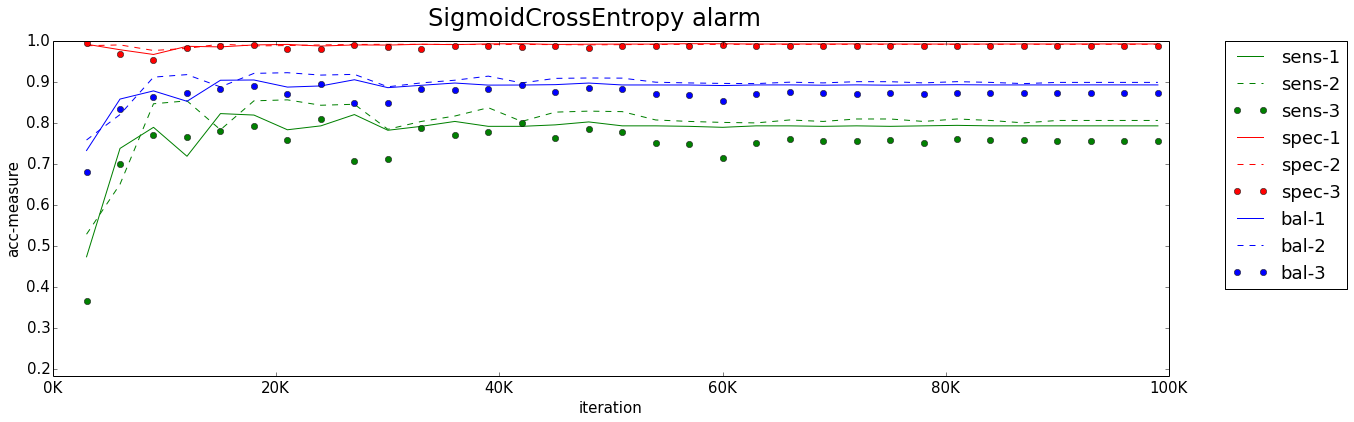

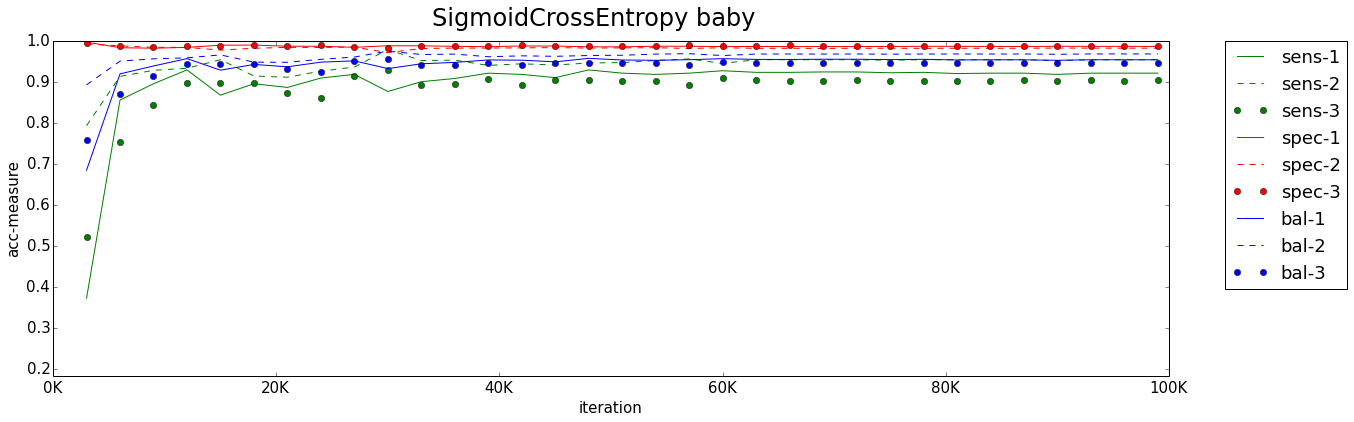

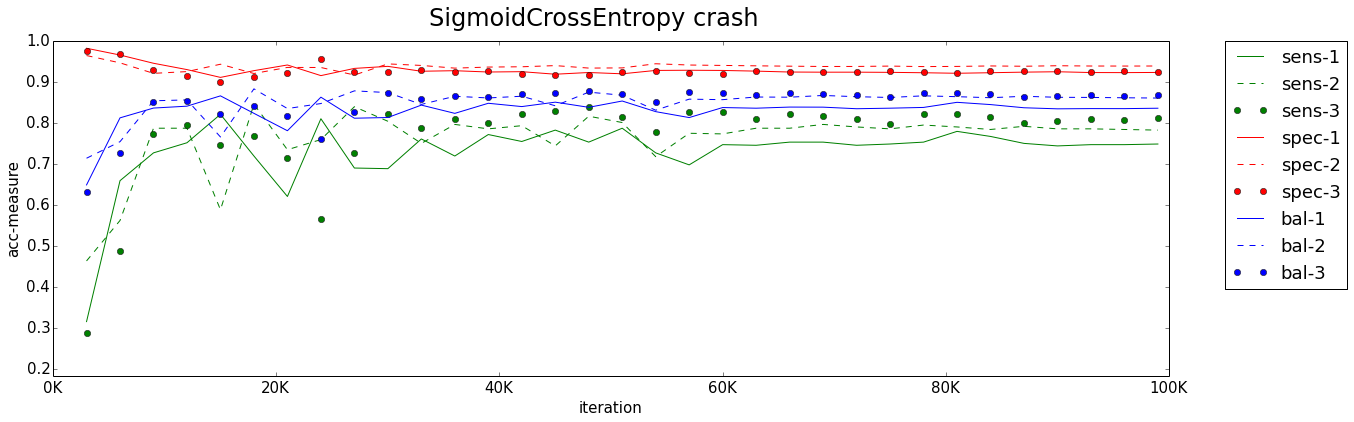

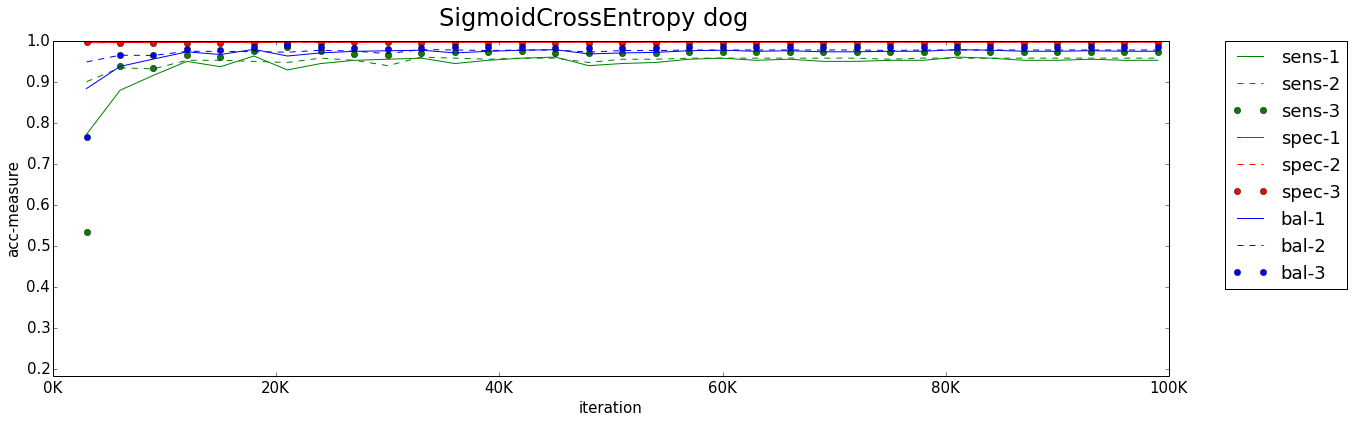

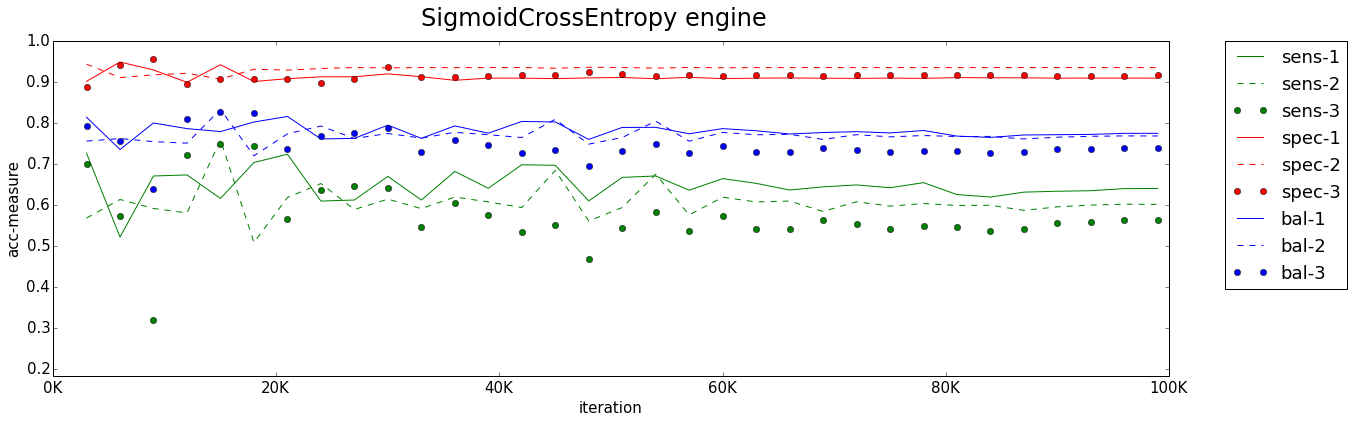

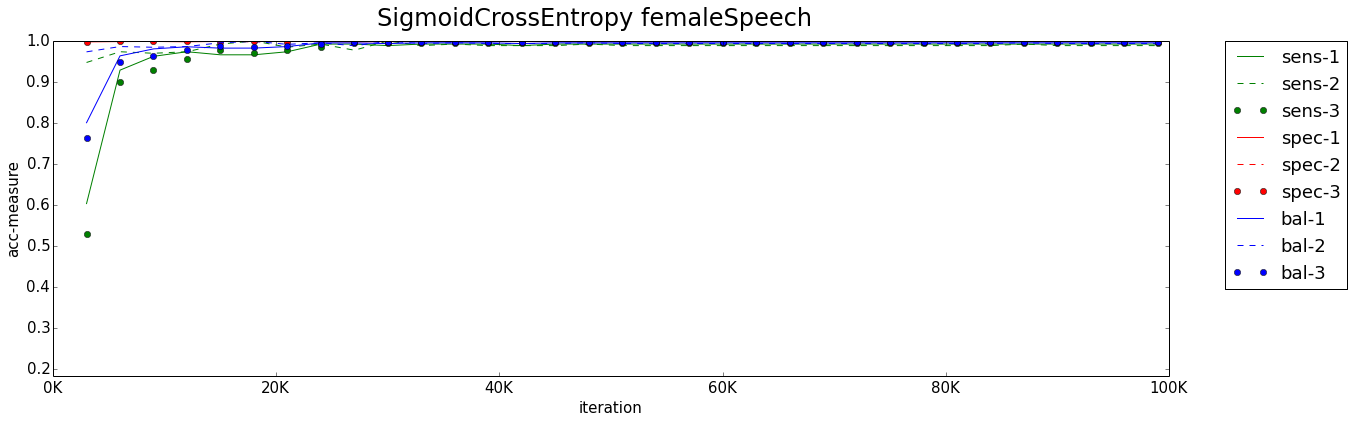

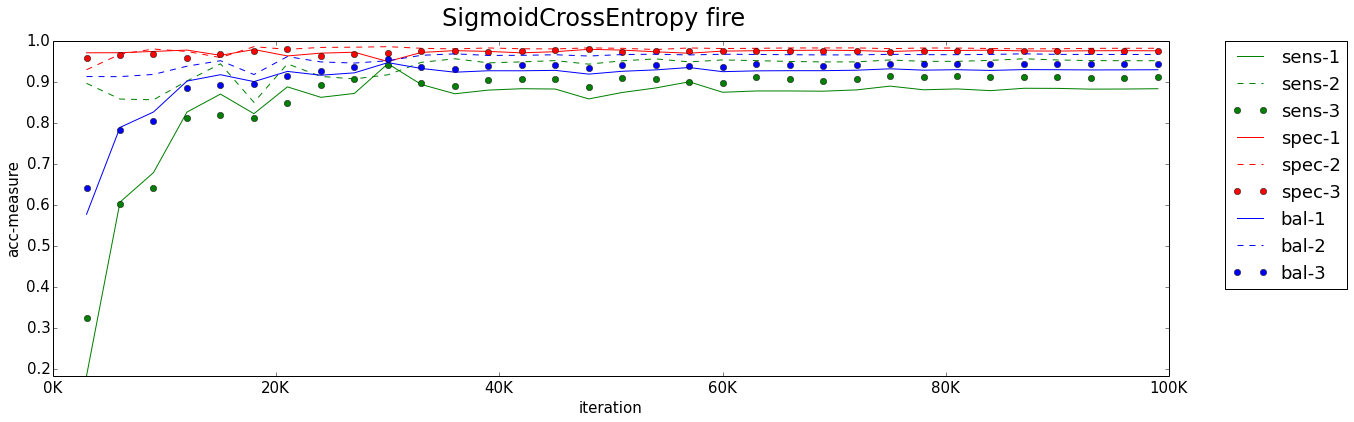

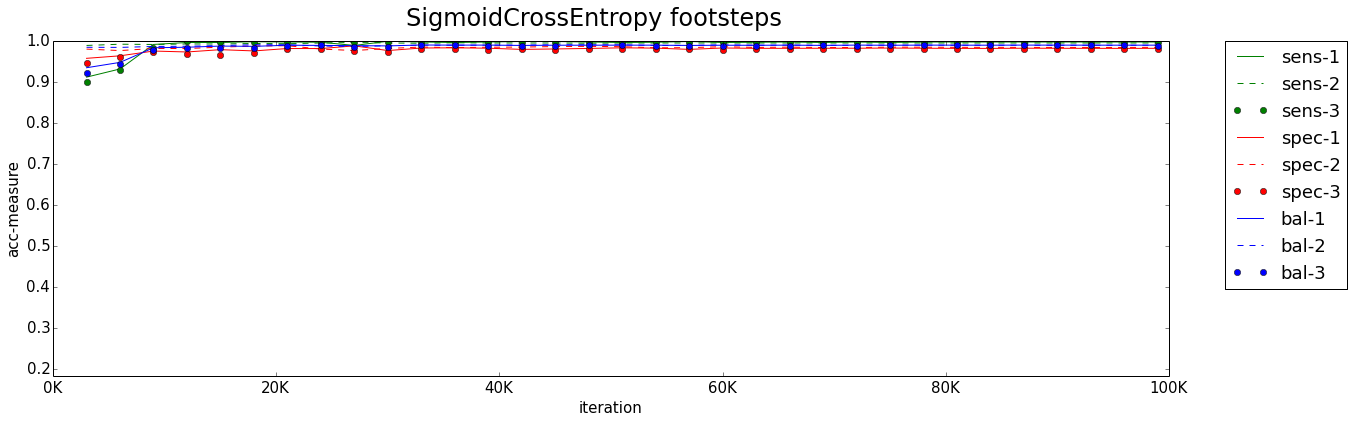

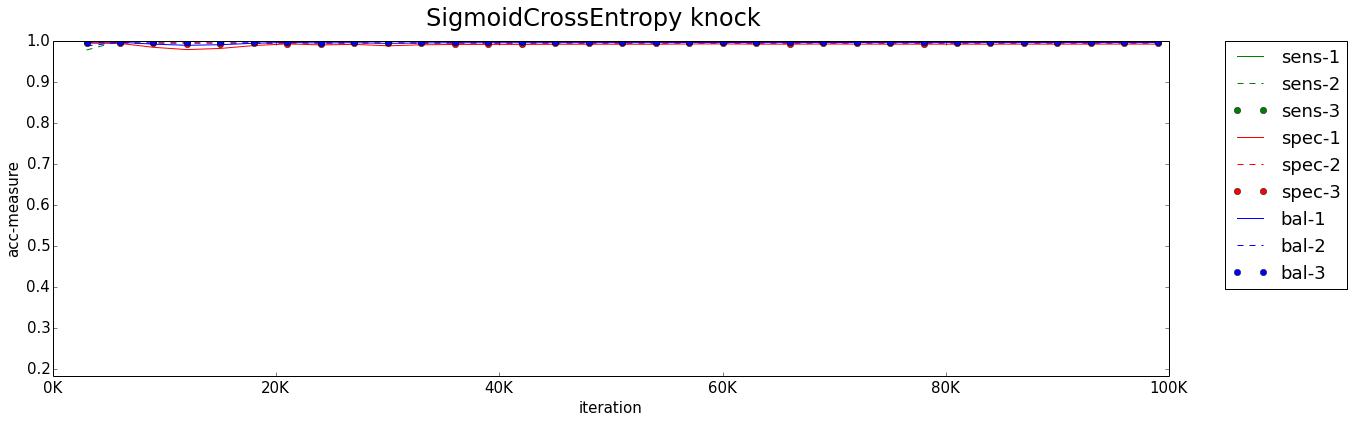

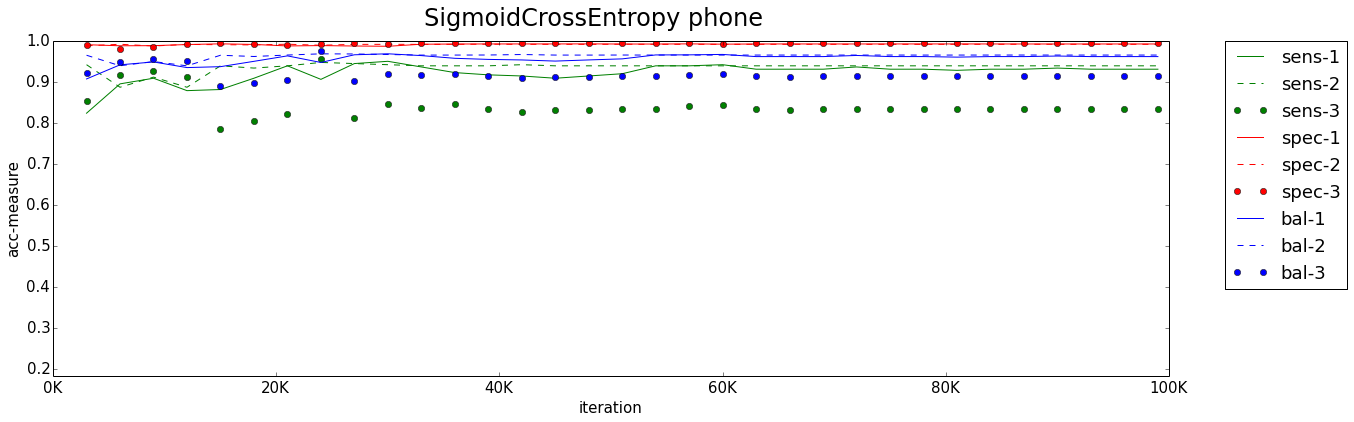

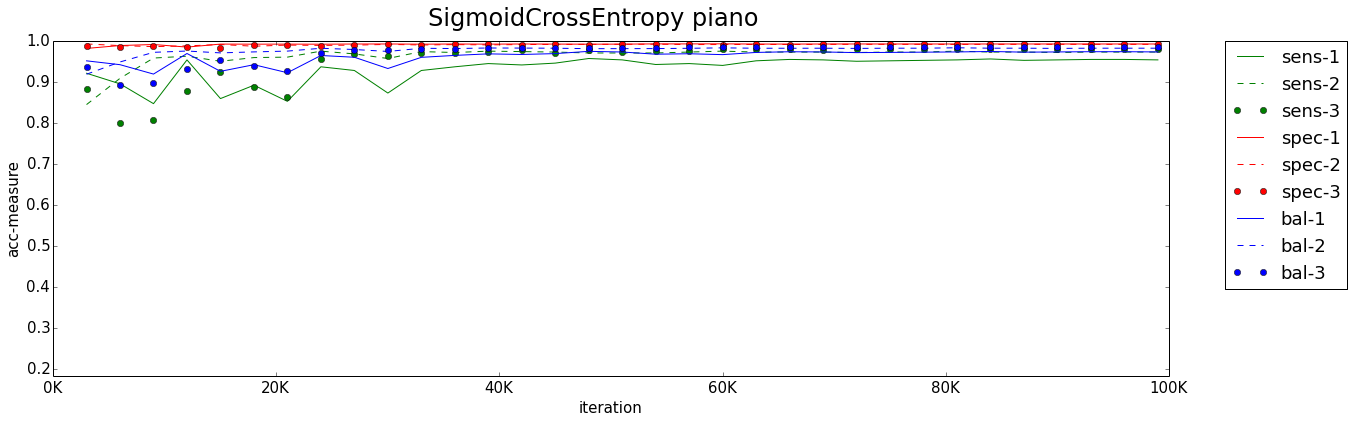

In [12]:
#####################plot#####################
K = len(soundTypes)  #get number of class labels

#get y aixs range
accValues = np.concatenate((sens_1,
                           spec_1,
                           bal_1,
                           sens_2,
                            spec_2,
                            bal_2,
                           sens_3,
                            spec_3,
                            bal_3))
minY = np.min(accValues)
maxY = np.max(accValues)
for s in range(K):
    plt.figure(figsize=(20,6))
    plt.suptitle('SigmoidCrossEntropy '+soundTypes[s],fontsize=24)
    
    plt.plot(it_1, sens_1[:,s],color='green',label='sens-1')
    plt.plot(it_2, sens_2[:,s],'--',color='green',label='sens-2')
    plt.plot(it_3, sens_3[:,s],'o',color='green',label='sens-3')

    plt.plot(it_1, spec_1[:,s], color='red',label='spec-1')
    plt.plot(it_2, spec_2[:,s],'--',color='red',label='spec-2')
    plt.plot(it_3, spec_3[:,s],'o',color='red',label='spec-3')
    
    plt.plot(it_1, bal_1[:,s],color='blue',label='bal-1')
    plt.plot(it_2, bal_2[:,s],'--',color='blue',label='bal-2')
    plt.plot(it_3, bal_3[:,s],'o',color='blue',label='bal-3')
    
    plt.xlabel('iteration')
    plt.ylabel('acc-measure')
    
    plt.ylim((minY,maxY))
    ticks, _ = plt.xticks()
    
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})

    ########## TODO ###########
    # save the plots under the directory you choose
#     plt.savefig(root_path+'acc_measures'+str(s+1).zfill(2)+soundTypes[s]+'.png')

    # print the values from last iteration
    print 'last iteration acc-measurements for %s'%soundTypes[s]
#     print '\t SCE \t SCE_ndrp '
    print '\t ([-30,30],[-8,8]) \t ([-15,15],[-4,4]) \t ([-40,40],[-8,8])'
    print 'sens\t %f \t \t %f \t \t %f'%(sens_1[-1,s],sens_2[-1,s],sens_3[-1,s])
    print 'spec \t %f \t \t %f \t \t %f'%(spec_1[-1,s],spec_2[-1,s],spec_3[-1,s])
    print 'bal \t %f \t \t %f \t \t %f'%(bal_1[-1,s],bal_2[-1,s],bal_3[-1,s])

## Average Accuracy

In [13]:
avSensSCE_ft = np.mean(sens_list_SCE_ft,axis=1)
avSpecSCE_ft = np.mean(spec_list_SCE_ft,axis=1)
avBalSCE_ft = np.mean(bal_acclist_SCE_ft,axis=1)

avSensSCE_nd = np.mean(sens_list_aug_nd,axis=1)
avSpecSCE_nd = np.mean(spec_list_aug_nd,axis=1)
avBalSCE_nd = np.mean(bal_acclist_aug_nd,axis=1)

accValues = np.concatenate((avSensSCE_nd,
                            avSpecSCE_nd,
                            avBalSCE_nd,
                           avSensSCE_ft,
                          avSpecSCE_ft,
                          avBalSCE_ft))
minY = np.min(accValues)
maxY = np.max(accValues)
plt.figure(figsize=(20,6))
plt.suptitle('SigmoidCrossEntropy Average Performance',fontsize=24)
    
plt.plot(it_list_SCE, avSensSCE_nd,color='green',label='sens-ndrp')
plt.plot(it_list_SCE_ft, avSensSCE_ft,'--',color='green',label='sens-ft')

    
plt.plot(it_list_SCE, avSpecSCE_nd, color='red',label='spec-ndrp')
plt.plot(it_list_SCE_ft, avSpecSCE_ft,'--',color='red',label='spec-ft')
    
plt.plot(it_list_SCE, avBalSCE_nd,color='blue',label='bal-ndrp')
plt.plot(it_list_SCE_ft, avBalSCE_ft,'--',color='blue',label='bal-ft')
    
plt.xlabel('iteration')
plt.ylabel('sens-spec')
    
plt.ylim((minY,maxY))

ticks, _ = plt.xticks()
    
plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})
plt.show()

######print average#######
print 'average balanced accuracy'
print '\t SCE_nd \t  SCE '
print 'sens\t %f \t %f'%(avSensSCE_nd[-1],avSensSCE_ft[-1])
print 'spec \t %f \t %f'%(avSpecSCE_nd[-1],avSpecSCE_ft[-1])
print 'bal \t %f \t %f'%(avBalSCE_nd[-1],avBalSCE_ft[-1])

NameError: name 'sens_list_SCE_ft' is not defined